# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

browser.visit(url)

# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)


False

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

 # Scrape the website
html = browser.html

# Create a BeautifulSoup object from the scraped HTML
mars_soup = soup(html, 'html.parser') 

In [5]:
# Extract all rows of data

mars_soup.get_text("|", strip=True)


'Mars Temperature Data|Mission To Mars|Mars Temperature Data|This is Mars data.|id|terrestrial_date|sol|ls|month|min_temp|pressure|2|2012-08-16|10|155|6|-75.0|739.0|13|2012-08-17|11|156|6|-76.0|740.0|24|2012-08-18|12|156|6|-76.0|741.0|35|2012-08-19|13|157|6|-74.0|732.0|46|2012-08-20|14|157|6|-74.0|740.0|57|2012-08-21|15|158|6|-78.0|740.0|68|2012-08-22|16|158|6|-77.0|740.0|79|2012-08-23|17|159|6|-76.0|742.0|112|2012-08-27|21|161|6|-74.0|741.0|114|2012-08-28|22|162|6|-74.0|742.0|123|2012-08-29|23|162|6|-75.0|741.0|134|2012-08-30|24|163|6|-75.0|742.0|145|2012-08-31|25|163|6|-75.0|743.0|156|2012-09-01|26|164|6|-76.0|745.0|163|2012-09-02|27|164|6|-75.0|743.0|170|2012-09-03|28|165|6|-75.0|745.0|171|2012-09-04|29|166|6|-75.0|747.0|172|2012-09-05|30|166|6|-74.0|747.0|173|2012-09-06|31|167|6|-74.0|745.0|175|2012-09-08|33|168|6|-73.0|748.0|176|2012-09-10|34|168|6|-73.0|748.0|177|2012-09-11|35|169|6|-73.0|749.0|178|2012-09-12|36|169|6|-73.0|750.0|179|2012-09-13|37|170|6|-73.0|750.0|180|2012-09-14

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list

data = []
rows = mars_soup.find_all('tr')
for row in rows[1:]:  # Start at index 1 to skip the first row
    cells = row.find_all('td')
    row_data = []
    for cell in cells:
        row_data.append(cell.text)
    data.append(row_data)
    
# Loop through the scraped data to create a list of rows
df_mars_weather = pd.DataFrame(data, columns=['id','terrestrial_date','sol','ls','month','min_temp','pressure'])


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data)
print(df_mars_weather)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [8]:
# Confirm DataFrame was created successfully
df_mars_weather.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df_mars_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis

df_mars_weather["id"] = df_mars_weather['id'].astype(int)
df_mars_weather['terrestrial_date'] = pd.to_datetime(df_mars_weather['terrestrial_date'])
df_mars_weather["sol"] = df_mars_weather['sol'].astype(int)
df_mars_weather["ls"] = df_mars_weather['ls'].astype(int)
df_mars_weather["month"] = df_mars_weather['month'].astype(int)
df_mars_weather["min_temp"] = df_mars_weather['min_temp'].astype(float)
df_mars_weather["pressure"] = df_mars_weather['pressure'].astype(float)





In [11]:
df_mars_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [12]:
# Confirm type changes were successful by examining data types again

df_mars_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?

df_mars_weather['month'].nunique()

12

In [17]:
# 2. How many Martian days' worth of data are there?

df_mars_weather['terrestrial_date'].nunique()

1867

In [46]:
# 3. What is the average low temperature by month?

avg_temp_by_month = df_mars_weather.groupby('month')['min_temp'].mean()
print(avg_temp_by_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


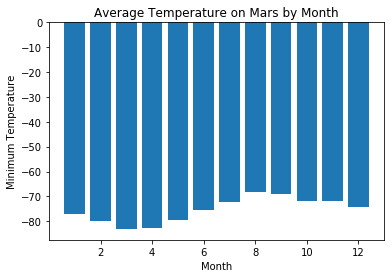

In [20]:
# Create a bar plot with the average temperature by month
plt.bar(avg_temp_by_month.index, avg_temp_by_month.values)

# Set the labels for the x and y axes
plt.xlabel('Month')
plt.ylabel('Minimum Temperature')

# Set the title for the plot
plt.title('Average Temperature on Mars by Month')

# Show the plot
plt.show()

In [23]:
# Identify the coldest month in Curiosity's location

avg_temp_by_month.argmin()+1

3

In [24]:
# Identify the hottest month in Curiosity's location

avg_temp_by_month.argmax()+1

8

In [47]:
# 4. Average pressure by Martian month

avg_pressure_by_month = df_mars_weather.groupby('month')['pressure'].mean()
print(avg_temp_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


In [55]:
# 4. Average pressure by Martian month

df_mars_weather['pressure'].mean()

841.0664167113016

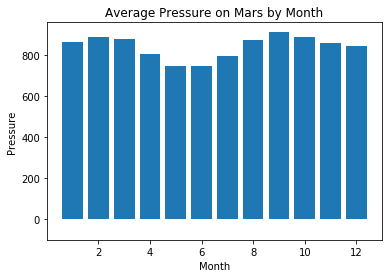

In [48]:
# Plot the average pressure by month

# Create a bar plot with the average temperature by month
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month.values)

# Set the labels for the x and y axes
plt.xlabel('Month')
plt.ylabel('Pressure')

# Set the title for the plot
plt.title('Average Pressure on Mars by Month')

plt.ylim(bottom=-100)

# Show the plot
plt.show()

In [28]:
# 5. How many terrestrial (earth) days are there in a Martian year?

df_mars_weather['year'] = df_mars_weather['terrestrial_date'].dt.year

df_mars_weather.head()



,id,terrestrial_date,sol,ls,month,min_temp,pressure,year
0,2,2012-08-16,10,155,6,-75.0,739.0,2012
1,13,2012-08-17,11,156,6,-76.0,740.0,2012
2,24,2012-08-18,12,156,6,-76.0,741.0,2012
3,35,2012-08-19,13,157,6,-74.0,732.0,2012
4,46,2012-08-20,14,157,6,-74.0,740.0,2012


In [48]:
mars_days_year = df_mars_weather.groupby('year')['terrestrial_date'].nunique()

mars_days_year.head()


year
2012    130
2013    290
2014    355
2015    340
2016    345
Name: terrestrial_date, dtype: int64

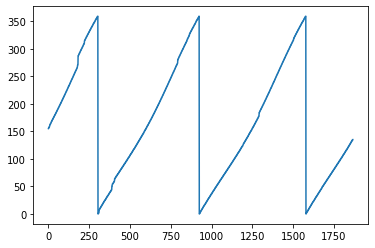

In [50]:
# 5. How many terrestrial (earth) days are there in a Martian year?

df_mars_weather['ls'].plot()
plt.show()

In [55]:
ls_0 = df_mars_weather['ls'] == 0
df_mars_weather[ls_0]

,id,terrestrial_date,sol,ls,month,min_temp,pressure,year
304,320,2013-08-01,351,0,1,-75.0,853.0,2013
305,319,2013-08-02,352,0,1,-77.0,854.0,2013
925,954,2015-06-19,1019,0,1,-81.0,849.0,2015
926,938,2015-06-20,1020,0,1,-63.0,832.0,2015
1579,1606,2017-05-06,1688,0,1,-76.0,840.0,2017
1580,1610,2017-05-07,1689,0,1,-75.0,840.0,2017


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



In [58]:
peaks = df_mars_weather['id'].isin([320,954,1606])
df_peaks = df_mars_weather[peaks].reset_index()
df_peaks

,index,id,terrestrial_date,sol,ls,month,min_temp,pressure,year
0,304,320,2013-08-01,351,0,1,-75.0,853.0,2013
1,925,954,2015-06-19,1019,0,1,-81.0,849.0,2015
2,1579,1606,2017-05-06,1688,0,1,-76.0,840.0,2017


In [73]:
# df_peaks['year_length'] = 

subtract_year = df_peaks['sol'].iloc[-1]
df_peaks['year_length'] = df_peaks['sol'].diff().fillna(0)

print(df_peaks)

   index    id terrestrial_date   sol  ls  month  min_temp  pressure  year  \
0    304   320       2013-08-01   351   0      1     -75.0     853.0  2013   
1    925   954       2015-06-19  1019   0      1     -81.0     849.0  2015   
2   1579  1606       2017-05-06  1688   0      1     -76.0     840.0  2017   

   year_length  
0          0.0  
1        668.0  
2        669.0  


Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [74]:
# Write the data to a CSV

df_mars_weather.to_csv("mars_weather_data.csv")

In [75]:
browser.quit()